In [1]:
import pandas as pd
import json

## Subset creation
The entire AITA dataset is far too large for this project as we only want to use a maximum of 50 prompts. As such we need create subset. Ideally our subset should contain an even distribution of labels and the examples should be of high quality.
However, first we need load the dataset. I have already downloaded the dataset but instructions for how to get it are provided [here](https://github.com/iterative/aita_dataset).

In [2]:
# load dataset
dataset_path = "../aita/aita_clean.csv"
aita_df = pd.read_csv(dataset_path)
aita_df.head()

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole
0,1ytxov,1.393279e+09,[AITA] I wrote an explanation in TIL and came ...,[Here is the post in question](http://www.redd...,False,asshole,52,13.0,1
1,1yu29c,1.393281e+09,[AITA] Threw my parent's donuts away,"My parents are diabetic, morbidly obese, and a...",1393290576.0,asshole,140,27.0,1
2,1yu8hi,1.393285e+09,I told a goth girl she looked like a clown.,I was four.,False,not the asshole,74,15.0,0
3,1yuc78,1.393287e+09,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,1393286962.0,everyone sucks,22,3.0,1
4,1yueqb,1.393288e+09,[AITA] I let my story get a little long and bo...,NaN,False,not the asshole,6,4.0,0


In [3]:
print(aita_df.body[0])

[Here is the post in question](http://www.reddit.com/r/todayilearned/comments/1y40m9/til_a_circle_of_infinite_circumference_is_a/cfhhajs?context=3)

It seems like I came off as an asshole. What can I do in the future to avoid this? I thought I was just randomly explaining something, which seems common on Reddit.

I definitely shouldn't have said "Sorry for trying to help" - That was pretty immature and rude. 

Am I the asshole here?

I wrote as little as possible to skew perspective as little as possible.


## Getting high quality examples
Reddit uses a [scoring system](https://www.reddit.com/wiki/faq/#wiki_how_is_a_submission.27s_score_determined.3F) for post whereby the score is determined by subtracting the number of downvotes from the number of upvotes. These were collected for the AITA dataset, so we will just use them as a measure of quality.

## Label Distribution
There are 4 possible verdicts in the dataset: *not the asshole*, *asshole*, *no assholes here* and *everyone sucks*. The authors of the dataset also merge *no assholes here* into the *not the asshole* category and  *everyone sucks* into the *asshole* category. The distribution highly favors the *not the asshole* category (see the following graphs).

<Axes: xlabel='verdict'>

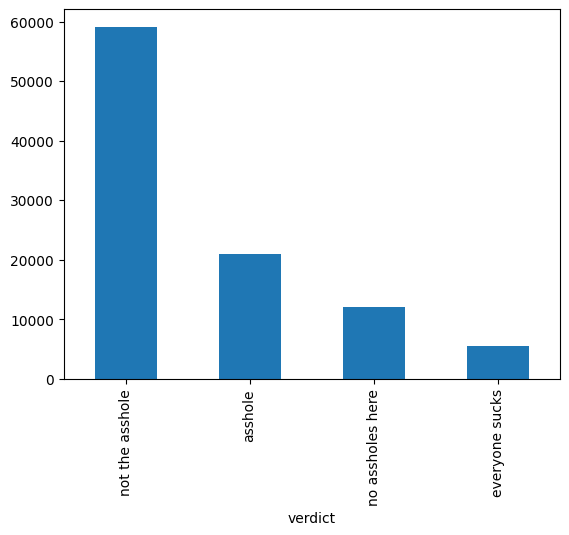

In [4]:
aita_df["verdict"].value_counts().plot(kind='bar')

<Axes: xlabel='is_asshole'>

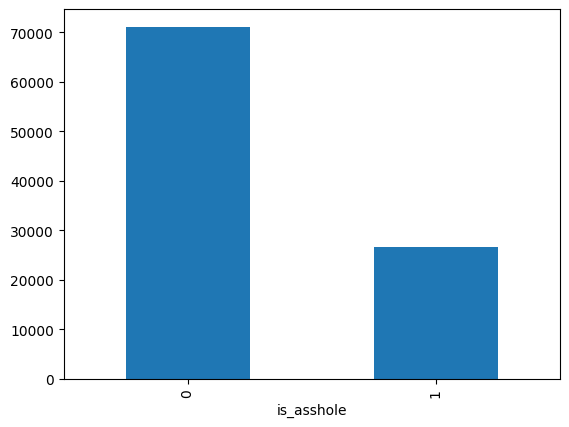

In [5]:
aita_df["is_asshole"].value_counts().plot(kind='bar')

## Making category subsets
We want high quality examples from each category in the dataset. For this purpose we will get the top n (sorted by score) examples for each category and manually select the ones to be used in the final dataset. Given the distribution, the aim is to have 15 each for *not the asshole* and *asshole* and 10 each for *no assholes here* and *everyone sucks here*.

In [6]:
# make subsets
grouped = aita_df.groupby("verdict")

subsets = {verdict: group for verdict, group in grouped}

In [7]:
aita_yta = subsets["asshole"]
aita_esh = subsets["everyone sucks"]
aita_nta = subsets["not the asshole"]
aita_nah = subsets["no assholes here"]

In [8]:
# sort by score and select top 50 examples
aita_yta = aita_yta.sort_values("score", ascending=False).head(50)
aita_esh = aita_esh.sort_values("score", ascending=False).head(50)
aita_nta = aita_nta.sort_values("score", ascending=False).head(50)
aita_nah = aita_nah.sort_values("score", ascending=False).head(50)

In [9]:
def content_to_json_file(df, path):
    df_json = json.loads(df.to_json(orient="records"))
    with open(path, "w", encoding='utf-8') as f:
        json.dump(df_json, f, indent=4, sort_keys=True)

In [10]:
content_to_json_file(aita_yta, "data/yta_top_50.json")
content_to_json_file(aita_esh, "data/esh_top_50.json")
content_to_json_file(aita_nta, "data/nta_top_50.json")
content_to_json_file(aita_nah, "data/nah_top_50.json")

## Choosing the top posts
The criteria for selecting posts are simple. The idea is to pick posts that do not require much or any editing and don't reference previous post or other external links.